# Business Analytics II Assignment I


###### Hektor Dahlberg 2201899

### TODO
- [x]  <a href="#task-1">Task 1</a>

    - [x] <a href="#data-exploration">Data Exploration</a>
        - [x] <a href="#data-exploration-eng">Engagement Trends by Time of Day</a>
            - [x] <a href="#data-exploration-eng-ans">Answer</a>
        - [x] <a href="#data-exploration-cont">Content Categories and Interaction Types</a>
            - [x] <a href="#data-exploration-cont-ans">Answer</a>
        - [x] <a href="#data-exploration-dev">Device Preferences</a>
            - [x] <a href="#data-exploration-dev-ans">Answer</a>
    - [x] <a href="#market-basket-analysis">Market Basket Analysis</a>
        - [x]  <a href="#market-basket-analysis-morning">Morning Basket</a>
        - [x]  <a href="#market-basket-analysis-evening">Evening Basket</a>
    - [x] <a href="#interpretation-and-recommendation">Interpretation and Recommendation:</a>
        - [x]  <a href="#interpretation-and-recommendation-analyze">Analyze The Association Rules</a>
- [x]  <a href="#task-2">Task 2</a>

    - [x]  <a href="#task-2-cent">Centrality Measures For The Network</a>
        - [x]  <a href="#task-2-cent-deg">Degree Centrality</a>
        - [x]  <a href="#task-2-cent-bet">Betweenness Centrality</a>
        - [x]  <a href="#task-2-cent-clo">Closeness Centrality</a>
        - [x]  <a href="#task-2-cent-pr">PageRank</a>
        - [x]  <a href="#task-2-cent-task">Perform Tasks</a>
- [x]  <a href="#task-3">Task 3</a>
    - [x]  <a href="#task-3-desc">Descriptive Analysis</a>
    - [x]  <a href="#task-3-rand">Random Forest</a>
    - [x]  <a href="#task-3-feat">Feature Selection</a>
    - [x]  <a href="#task-3-llm">Large Language Model</a>

- [x]  <a href="#task-4">Task 4</a>
    - [x]  <a href="#task-4-desc">Descriptive Analysis</a>
    - [x]  <a href="#task-4-top">Topic Modelling</a>

In [1]:
#  Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
! pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
stop_words = list(stopwords.words("english"))

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
!pip install torchmetrics
import torchmetrics
from torchmetrics.classification import BinaryAccuracy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 23.6 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 10.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 906.4/906.4 MB 232.3 MB/s eta 0:00:0100:01

ModuleNotFoundError: No module named 'torchmetrics'

In [2]:
import sys
print(sys.executable)
print(torch.__version__)

/opt/conda/bin/python
1.13.0+cpu


In [3]:
!pip uninstall torchmetrics
!pip install torchmetrics==0.11.0
import torchmetrics
from torchmetrics.classification import BinaryAccuracy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 kB 4.1 MB/s eta 0:00:0000:0100:01


In [4]:
!pip install mlxtend
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

print(mlxtend.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 28.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
0.23.2


<a id="task-1"></a>
#### Task 1.
(**8 points**, Association rules analysis) In this assignment, you will perform an association rules analysis on a dataset from the file social media user engagement.csv. The platform is used for content sharing and interaction, with users engaging through likes, shares, comments, and follows across various content categories such as technology, fitness, travel, food, and education. Each row in the dataset represents a user’s interaction with a piece of content.

In [5]:
# read in file
social = pd.read_csv("social_media_user_engagement.csv")
df = social.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User ID              5000 non-null   object
 1   Content Category     5000 non-null   object
 2   Interaction Type     5000 non-null   object
 3   Time of Interaction  5000 non-null   object
 4   Device Used          5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [6]:
# check unique values 
print("number of unique values per column:")
print(df.nunique())
print("----------------------------")

# remove ID column 

columns=df.iloc[:, 1:5]

for col in columns:
    print(f"Unique values in column {col}:")
    print(df[col].unique())
    print() 

number of unique values per column:
User ID                500
Content Category         5
Interaction Type         4
Time of Interaction      3
Device Used              3
dtype: int64
----------------------------
Unique values in column Content Category:
['Technology' 'Education' 'Fitness' 'Food' 'Travel']

Unique values in column Interaction Type:
['Share' 'Like' 'Follow' 'Comment']

Unique values in column Time of Interaction:
['Morning' 'Evening' 'Afternoon']

Unique values in column Device Used:
['Tablet' 'Mobile' 'Desktop']



<a id="data-exploration"></a>
### Data Exploration

<a id="data-exploration-eng"></a>
#### Engagement Trends by Time of Day:
which types of interactions are most common in different time periods (morning, afternoon, evening)?

In [7]:
interaction_counts = df.groupby(["Time of Interaction", "Interaction Type"]).size().reset_index(name="Count")
time_totals = interaction_counts.groupby("Time of Interaction")["Count"].transform("sum")
interaction_counts["Percentage"] = (interaction_counts["Count"] / time_totals) * 100

total_counts = interaction_counts.groupby("Time of Interaction").agg({"Count": "sum"}).reset_index()
total_counts["Interaction Type"] = "Total"
total_counts["Percentage"] = 100.0  

interaction_counts = pd.concat([interaction_counts, total_counts], ignore_index=True)

interaction_counts = interaction_counts.sort_values(["Interaction Type", "Percentage"], ascending=[True, False])

print(interaction_counts)

   Time of Interaction Interaction Type  Count  Percentage
8              Morning          Comment    423   25.283921
4              Evening          Comment    389   23.265550
0            Afternoon          Comment    321   19.395770
1            Afternoon           Follow    392   23.685801
5              Evening           Follow    386   23.086124
9              Morning           Follow    312   18.649133
10             Morning             Like    563   33.652122
2            Afternoon             Like    495   29.909366
6              Evening             Like    499   29.844498
3            Afternoon            Share    447   27.009063
7              Evening            Share    398   23.803828
11             Morning            Share    375   22.414824
12           Afternoon            Total   1655  100.000000
13             Evening            Total   1672  100.000000
14             Morning            Total   1673  100.000000


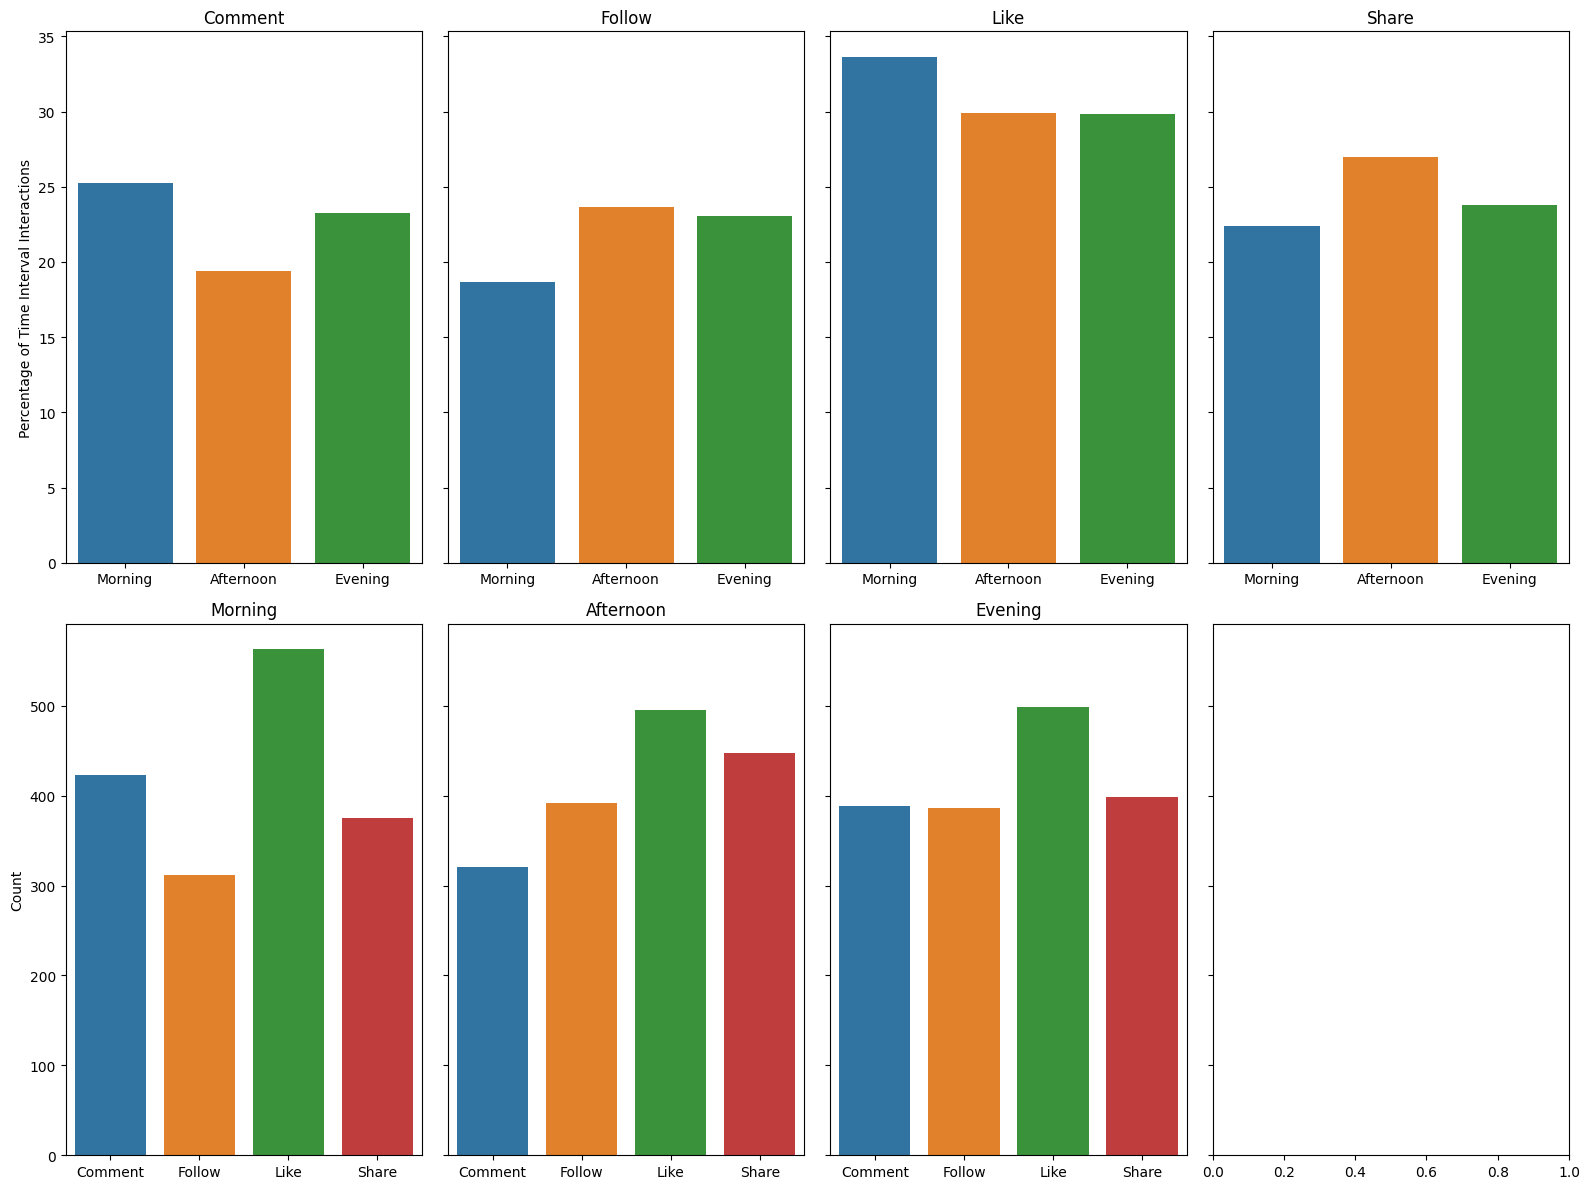

In [8]:
interaction_types = ["Comment", "Follow", "Like", "Share"]
time_periods = ["Morning", "Afternoon", "Evening"]

fig, axes = plt.subplots(2, len(interaction_types), figsize=(16, 12), sharey="row")


for i, interaction in enumerate(interaction_types):
    data = interaction_counts[interaction_counts["Interaction Type"] == interaction]
    
    sns.barplot(
        ax=axes[0, i],
        data=data,
        x="Time of Interaction",
        y="Percentage",
        order=time_periods, 
    )
    axes[0, i].set_title(interaction)
    axes[0, i].set_ylabel("Percentage of Time Interval Interactions" if i == 0 else "") 
    axes[0, i].set_xlabel("") 

    
    
for j, time_period in enumerate(time_periods):
    data = interaction_counts[(interaction_counts["Time of Interaction"] == time_period) & (interaction_counts["Interaction Type"] != "Total")]
    
    sns.barplot(
        ax=axes[1, j],
        data=data,
        x="Interaction Type",
        y="Count",
        order=interaction_types
    )
    axes[1, j].set_title(time_period)
    axes[1, j].set_ylabel("Count" if j == 0 else "")
    axes[1, j].set_xlabel("") 

plt.tight_layout()
plt.show()

<a id="data-exploration-eng-ans"></a>
### 1.1 Answer:
Most common interactions in different time periods:

**Count of interactions:**
- Morning: Like
- Afternoon: Like
- Evening: Like

**Percentage of interactions in time period:**
- Comment: Morning
- Follow: Afternoon
- Like: Morning
- Share: Afternoon

<a id="data-exploration-cont"></a>
#### Content Categories and Interaction Types:
investigate the most common types of interactions across different content categories. 

Are there patterns showing that certain types of content are more likely to be liked, shared, or commented on?

In [9]:
content_counts = df.groupby(["Content Category", "Interaction Type"]).size().reset_index(name="Count")
content_totals = content_counts.groupby("Content Category")["Count"].transform("sum")
content_counts["Percentage"] = (content_counts["Count"] / content_totals) * 100

tot_counts = content_counts.groupby("Content Category").agg({"Count": "sum"}).reset_index()
tot_counts["Interaction Type"] = "Total"
tot_counts["Percentage"] = 100.0  

content_counts = pd.concat([content_counts, tot_counts], ignore_index=True)

content_counts = content_counts.sort_values(["Content Category", "Percentage"], ascending=[True, False])
print(content_counts)

   Content Category Interaction Type  Count  Percentage
20        Education            Total    986  100.000000
3         Education            Share    361   36.612576
1         Education           Follow    267   27.079108
2         Education             Like    182   18.458418
0         Education          Comment    176   17.849899
21          Fitness            Total   1020  100.000000
4           Fitness          Comment    301   29.509804
6           Fitness             Like    277   27.156863
5           Fitness           Follow    262   25.686275
7           Fitness            Share    180   17.647059
22             Food            Total    997  100.000000
10             Food             Like    449   45.035105
8              Food          Comment    191   19.157472
9              Food           Follow    189   18.956871
11             Food            Share    168   16.850552
23       Technology            Total    993  100.000000
14       Technology             Like    374   37

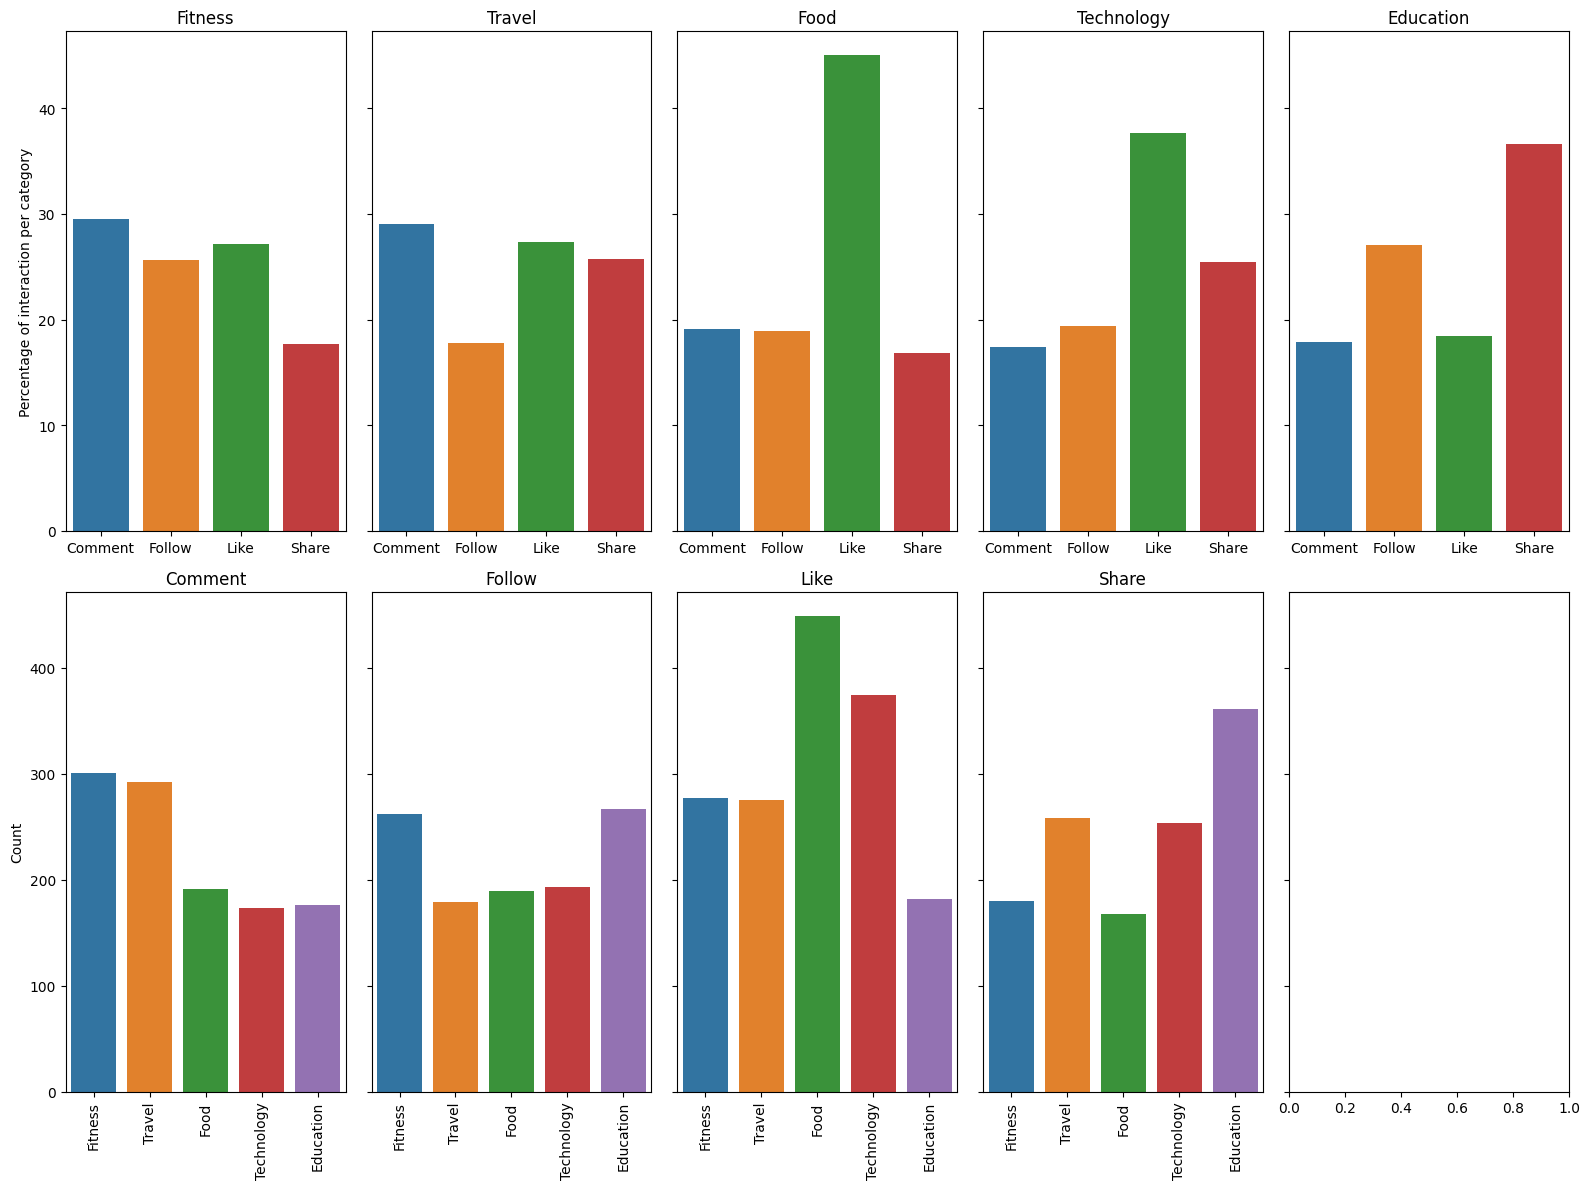

In [10]:
interaction_types = ["Comment", "Follow", "Like", "Share"]
content_category = ["Fitness", "Travel", "Food","Technology","Education"]

fig, axes = plt.subplots(2, len(content_category), figsize=(16, 12), sharey="row")


for i, category in enumerate(content_category):
    data = content_counts[content_counts["Content Category"] == category]
    
    sns.barplot(
        ax=axes[0,i],
        data=data,
        x="Interaction Type",
        y="Percentage",
        order=interaction_types, 
    )
    axes[0,i].set_title(category)
    axes[0,i].set_ylabel("Percentage of interaction per category" if i == 0 else "") 
    axes[0,i].set_xlabel("") 
    
for j, interaction in enumerate(interaction_types):
   
    data = content_counts[content_counts["Interaction Type"] == interaction]
    sns.barplot(
        ax=axes[1,j],
        data=data,
        x="Content Category", 
        y="Count", 
        order=content_category
    )
    axes[1,j].set_title(interaction)
    axes[1,j].set_ylabel("Count" if j == 0 else "")
    axes[1,j].set_xlabel("")  
    axes[1,j].tick_params(axis="x", rotation=90)
plt.tight_layout()
plt.show()

<a id="data-exploration-cont-ans"></a>
### 1.2 Answer:
**the most common types of interactions across different content categories:**

- Fitness: Comment
- Travel: Comment
- Food: Like
- Technology: Like
- Education: Share

**Are there patterns showing that certain types of content are more likely to be liked, shared, or commented on?**

Yes there are for example content of type Food is highly likely to be liked while content of type education is not that likely to be shared.

<a id="data-exploration-dev"></a>
#### Device Preferences:
examine if users interact differently with content depending on the device they are using (mobile, desktop, tablet). For example, are mobile users more likely to ”like” content, while desktop users are more prone to ”comment” or ”share”?

In [11]:
device_counts = df.groupby(["Device Used", "Interaction Type"]).size().reset_index(name="Count")


device_totals = device_counts.groupby("Interaction Type")["Count"].transform("sum")
device_counts["Percentage"] = (device_counts["Count"] / device_totals) * 100

tot_counts = device_counts.groupby("Device Used").agg({"Count": "sum"}).reset_index()
tot_counts["Interaction Type"] = "Total"
tot_counts["Percentage"] = 100.0  

device_counts = pd.concat([device_counts, tot_counts], ignore_index=True)

device_counts = device_counts.sort_values(["Device Used", "Percentage"], ascending=[True, False])
print(device_counts)




   Device Used Interaction Type  Count  Percentage
12     Desktop            Total   1756  100.000000
1      Desktop           Follow    491   45.045872
0      Desktop          Comment    440   38.834951
3      Desktop            Share    472   38.688525
2      Desktop             Like    353   22.671805
13      Mobile            Total   1670  100.000000
6       Mobile             Like    726   46.628131
7       Mobile            Share    372   30.491803
4       Mobile          Comment    292   25.772286
5       Mobile           Follow    280   25.688073
14      Tablet            Total   1574  100.000000
8       Tablet          Comment    401   35.392763
11      Tablet            Share    376   30.819672
10      Tablet             Like    478   30.700064
9       Tablet           Follow    319   29.266055


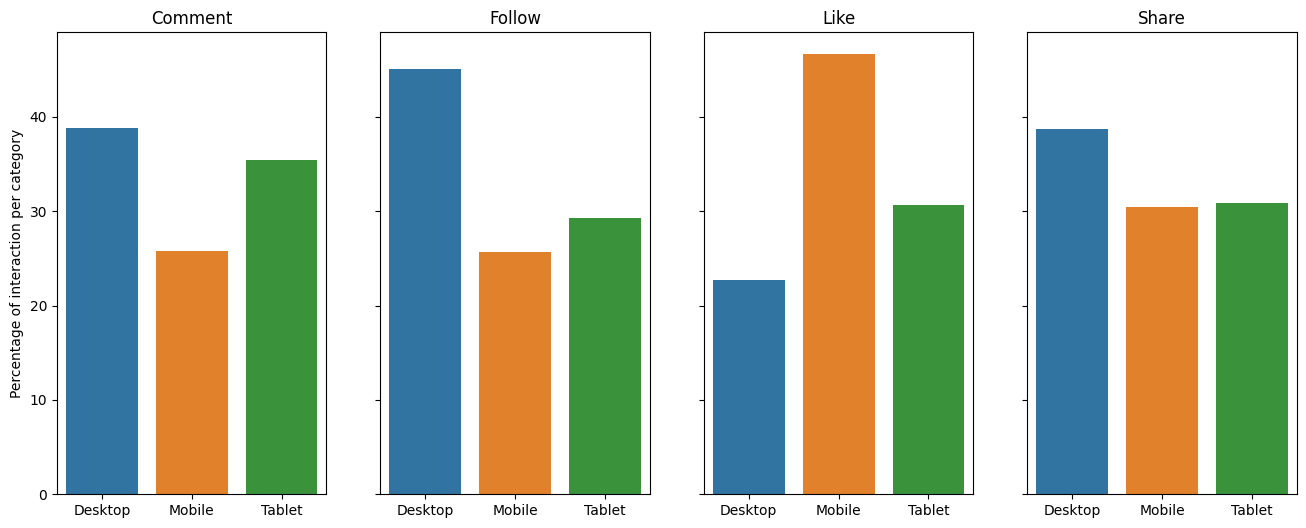

In [12]:
# percentage of device users interaction type
interaction_types = ["Comment", "Follow", "Like", "Share"]
device_category = ["Desktop", "Mobile", "Tablet"]

fig, axes = plt.subplots(1, len(interaction_types), figsize=(16, 6), sharey="row")


for i, category in enumerate(interaction_types):
    data = device_counts[device_counts["Interaction Type"] == category]
    
    sns.barplot(
        ax=axes[i],
        data=data,
        x="Device Used",
        y="Percentage",
        order=device_category, 
    )
    axes[i].set_title(category)
    axes[i].set_ylabel("Percentage of interaction per category" if i == 0 else "") 
    axes[i].set_xlabel("") 
    

<a id="data-exploration-dev-ans"></a>
### 1.3 Answer:
**Users interact differently with content depending on the device they are using:**

- Desktop users: use the interaction **Follow** much more than Mobile and Tablet users.
- Mobile users: use the interaction **Like** much more than Desktop and Tablet users.
- Tablet users: use **all** the interactions, they never use an interaction the most or least. 


<a id="market-basket-analysis"></a>
### Market Basket Analysis:

<a id="market-basket-analysis-morning"></a>
#### Market Basket Analysis Morning:
First, filter your data and focus on interactions made during the morning. Transform the data into transactional format (where each transaction corresponds to a user’s morning interactions), extract frequent item-sets, and create association rules. Use different support and confidence values to identify the appropriate number of rules.

In [13]:
# filtrer out so only morning and then make so that an user has things it used, interacted and group in a list
df_morning = df[df["Time of Interaction"] == "Morning"]
df_morning = df_morning.sort_values(by="User ID")
transactions = df_morning.groupby("User ID").apply(
    lambda x: x[["Content Category", "Interaction Type", "Device Used"]].values.flatten().tolist()
).tolist()


In [14]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

df_transactions = df_transactions.astype(bool)

In [15]:
#min 0.2
frequent_itemsets2 = apriori(df_transactions, min_support=0.2, max_len = 4, use_colnames=True)
#min 0.3
frequent_itemsets1 = apriori(df_transactions, min_support=0.3, max_len = 4, use_colnames=True)

print('Number of frequent itemsets with min_support 20%:', len(frequent_itemsets2))
print('Number of frequent itemsets with min_support 30%:', len(frequent_itemsets1))

frequent_itemsets_2 = frequent_itemsets2[frequent_itemsets2["itemsets"].apply(lambda x: len(x) > 1)]
frequent_itemsets_2 = frequent_itemsets_2.sort_values(by="support", ascending=False)
frequent_itemsets_2.head(20)

Number of frequent itemsets with min_support 20%: 337
Number of frequent itemsets with min_support 30%: 98


,support,itemsets
63,0.555789,"(Like, Mobile)"
27,0.549474,"(Desktop, Like)"
28,0.524211,"(Desktop, Mobile)"
12,0.505263,"(Desktop, Comment)"
65,0.503158,"(Like, Tablet)"
30,0.477895,"(Desktop, Tablet)"
18,0.458947,"(Mobile, Comment)"
69,0.456842,"(Mobile, Tablet)"
29,0.446316,"(Desktop, Share)"
20,0.437895,"(Tablet, Comment)"


In [16]:
rules1 = association_rules(frequent_itemsets1, metric="lift",num_itemsets = frequent_itemsets1.shape[0], min_threshold=1.0)
rules1 = rules1.sort_values(by="support", ascending=False)
print(len(rules1))

rules2 = association_rules(frequent_itemsets2, metric="lift",num_itemsets = frequent_itemsets2.shape[0], min_threshold=1.0)
rules2 = rules2.sort_values(by="support", ascending=False)
print(len(rules2))


306
2378


In [17]:
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
75,(Mobile),(Like),0.701053,0.703158,0.555789,0.792793,1.127475,1.0,0.062839,1.432586,0.378201,0.655087,0.301962,0.791606
74,(Like),(Mobile),0.703158,0.701053,0.555789,0.790419,1.127475,1.0,0.062839,1.426406,0.380883,0.655087,0.298937,0.791606
25,(Like),(Desktop),0.703158,0.753684,0.549474,0.781437,1.036823,1.0,0.019515,1.126979,0.119643,0.605568,0.112672,0.755244
24,(Desktop),(Like),0.753684,0.703158,0.549474,0.729050,1.036823,1.0,0.019515,1.095562,0.144186,0.605568,0.087226,0.755244
0,(Desktop),(Comment),0.753684,0.604211,0.505263,0.670391,1.109532,1.0,0.049879,1.200785,0.400783,0.592593,0.167211,0.753314


In [18]:
#filter rules2
filtered_rules_morning = rules2[(rules2['antecedent support'] > 0.45) & (rules2['consequent support'] > 0.50) & 
                       (rules2['confidence'] > 0.50) ]
filtered_rules_morning.sort_values(['confidence', 'support'], ascending = [False, False])[['antecedents','consequents', 'support', 'confidence']]

,antecedents,consequents,support,confidence
1,(Comment),(Desktop),0.505263,0.836237
128,"(Mobile, Comment)",(Desktop),0.383158,0.834862
487,"(Desktop, Mobile)",(Like),0.435789,0.831325
926,"(Mobile, Tablet)",(Like),0.376842,0.824885
29,(Technology),(Desktop),0.397895,0.821739
...,...,...,...,...
142,(Tablet),"(Desktop, Comment)",0.351579,0.518634
56,(Like),(Follow),0.360000,0.511976
124,(Like),"(Desktop, Comment)",0.357895,0.508982
1235,"(Like, Tablet)","(Desktop, Comment)",0.254737,0.506276


<a id="market-basket-analysis-evening"></a>
#### Market Basket Analysis Evening:
Repeat the same steps for interactions made in the evening to see if there are differences in user engagement compared to the morning.

In [19]:
df_evening = df[df["Time of Interaction"] == "Evening"]
df_evening = df_evening.sort_values(by="User ID")
transactions = df_evening.groupby("User ID").apply(
    lambda x: x[["Content Category", "Interaction Type", "Device Used"]].values.flatten().tolist()
).tolist()

In [20]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

df_transactions = df_transactions.astype(bool)

In [21]:
#min 0.2
frequent_itemsets2 = apriori(df_transactions, min_support=0.2, max_len = 4, use_colnames=True)
#min 0.3
frequent_itemsets1 = apriori(df_transactions, min_support=0.3, max_len = 4, use_colnames=True)

print('Number of frequent itemsets with min_support 20%:', len(frequent_itemsets2))
print('Number of frequent itemsets with min_support 30%:', len(frequent_itemsets1))

frequent_itemsets_2 = frequent_itemsets2[frequent_itemsets2["itemsets"].apply(lambda x: len(x) > 1)]
frequent_itemsets_2 = frequent_itemsets_2.sort_values(by="support", ascending=False)
frequent_itemsets_2.head(20)

Number of frequent itemsets with min_support 20%: 313
Number of frequent itemsets with min_support 30%: 89


,support,itemsets
63,0.550000,"(Like, Mobile)"
28,0.493750,"(Desktop, Mobile)"
69,0.468750,"(Mobile, Tablet)"
29,0.462500,"(Desktop, Share)"
25,0.462500,"(Desktop, Follow)"
65,0.462500,"(Like, Tablet)"
30,0.460417,"(Desktop, Tablet)"
27,0.447917,"(Desktop, Like)"
52,0.427083,"(Follow, Mobile)"
68,0.425000,"(Share, Mobile)"


In [22]:
rules1 = association_rules(frequent_itemsets1, metric="lift",num_itemsets = frequent_itemsets1.shape[0], min_threshold=1.0)
rules1 = rules1.sort_values(by="support", ascending=False)
print(len(rules1))

rules2 = association_rules(frequent_itemsets2, metric="lift",num_itemsets = frequent_itemsets2.shape[0], min_threshold=1.0)
rules2 = rules2.sort_values(by="support", ascending=False)
print(len(rules2))

236
2100


In [23]:
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
77,(Mobile),(Like),0.727083,0.641667,0.5500,0.756447,1.178878,1.0,0.083455,1.471275,0.555980,0.671756,0.320317,0.806795
76,(Like),(Mobile),0.641667,0.727083,0.5500,0.857143,1.178878,1.0,0.083455,1.910417,0.423450,0.671756,0.476554,0.806795
21,(Follow),(Desktop),0.570833,0.697917,0.4625,0.810219,1.160911,1.0,0.064106,1.591747,0.322969,0.573643,0.371759,0.736453
20,(Desktop),(Follow),0.697917,0.570833,0.4625,0.662687,1.160911,1.0,0.064106,1.272308,0.458838,0.573643,0.214027,0.736453
79,(Tablet),(Like),0.664583,0.641667,0.4625,0.695925,1.084558,1.0,0.036059,1.178436,0.232444,0.548148,0.151418,0.708352


In [24]:
#filter rules2
filtered_rules_evening = rules2[(rules2['antecedent support'] > 0.45) & (rules2['consequent support'] > 0.50) & (rules2['confidence'] > 0.50) ]
filtered_rules_evening.sort_values(['confidence', 'support'], ascending = [False, False])[['antecedents','consequents', 'support', 'confidence']]

,antecedents,consequents,support,confidence
76,(Like),(Mobile),0.550000,0.857143
905,"(Like, Tablet)",(Mobile),0.383333,0.828829
87,(Technology),(Mobile),0.402083,0.828326
27,(Share),(Desktop),0.462500,0.822222
906,"(Mobile, Tablet)",(Like),0.383333,0.817778
...,...,...,...,...
71,(Mobile),(Food),0.387500,0.532951
82,(Like),(Travel),0.339583,0.529221
59,(Follow),(Food),0.302083,0.529197
35,(Education),(Food),0.283333,0.523077


<a id="interpretation-and-recommendation"></a>
### Interpretation and Recommendation:

<a id="interpretation-and-recommendation-analyze"></a>
#### Analyze the association rules:
Are the rules reflecting common engagement patterns, or do they reveal unexpected insights about how users interact with content?

In [25]:
# check if there are any rules that only exist for morning and vice vera
eve = filtered_rules_evening[["antecedents", "consequents"]]
mor = filtered_rules_morning[["antecedents", "consequents"]]

#intersection
common_rules = pd.merge(eve, mor, how="inner", on=["antecedents", "consequents"])

# evening onlt
evening_only = pd.merge(eve, mor, how="left", on=["antecedents", "consequents"], indicator=True)
evening_only = evening_only[evening_only["_merge"] == "left_only"].drop(columns=["_merge"])

morning_only = pd.merge(eve, mor, how="right", on=["antecedents", "consequents"], indicator=True)
morning_only = morning_only[morning_only["_merge"] == "right_only"].drop(columns=["_merge"])

In [26]:
print("Common rules between evening and morning:")
common_rules

Common rules between evening and morning:


,antecedents,consequents
0,(Mobile),(Like)
1,(Like),(Mobile)
2,(Follow),(Desktop)
3,(Desktop),(Follow)
4,(Tablet),(Like)
...,...,...
101,"(Desktop, Tablet)",(Travel)
102,"(Like, Tablet)",(Follow)
103,"(Like, Tablet)",(Share)
104,"(Desktop, Tablet)","(Like, Mobile)"


In [27]:
print("Rules unique to evening data:")
evening_only

Rules unique to evening data:


,antecedents,consequents
31,(Desktop),(Food)
37,(Tablet),(Food)
41,(Mobile),(Food)
52,(Like),(Food)
65,"(Desktop, Share)",(Mobile)
69,"(Desktop, Share)",(Education)
70,"(Mobile, Tablet)",(Desktop)
71,"(Desktop, Mobile)",(Tablet)
75,"(Like, Tablet)",(Desktop)
79,"(Desktop, Follow)",(Tablet)


In [28]:
print("Rules unique to morning data:")
print(morning_only.shape)
morning_only.head(30)

Rules unique to morning data:
(91, 2)


,antecedents,consequents
12,(Desktop),(Fitness)
16,(Desktop),"(Like, Mobile)"
17,(Mobile),"(Desktop, Like)"
18,(Like),"(Desktop, Mobile)"
19,"(Like, Mobile)",(Desktop)
21,"(Desktop, Like)",(Mobile)
26,(Mobile),(Fitness)
34,(Comment),(Fitness)
46,(Tablet),(Fitness)
48,(Like),(Fitness)


#### Are the rules reflecting common engagement patterns, or do they reveal unexpected insights about how users interact with content?
Yes the rules that only is in evening shows that evening and Food has a pattern, which makes sense as people do not really search for recipes in the morning.

For morning alot more Fitness.


<a id="task-2"></a>
### Task 2.
(**6 points**, Network centrality measures) In this assignment, you will analyze a dataset representing a referral network among hospitals and healthcare providers. The referrals.csv file includes patient referral connections between healthcare providers, while the hospitals.csv file contains information about the hospitals, including their name, location, and specialization (e.g., cardiology, oncology, etc.). The ID column of hospitals.csv can be used to connect it to the links in referrals.csv. Your task is to identify the most central hospitals within this network, which signify key players in healthcare services.

<a id="task-2-cent"></a>
### Centrality measures for the network

In [29]:
# read in files
hospitals = pd.read_csv("hospitals.csv")
referrals=  pd.read_csv("referrals.csv")
print(referrals.info())
print(hospitals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  226 non-null    object
 1   Target  226 non-null    object
dtypes: object(2)
memory usage: 3.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              100 non-null    object
 1   Name            100 non-null    object
 2   Location        100 non-null    object
 3   Specialization  100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB
None


In [30]:
# Build network
G = nx.DiGraph()
# add nodes for hosptials
for index, row in hospitals.iterrows():
    G.add_node(row["ID"], name=row["Name"], location=row["Location"], specialization=row["Specialization"])
# add edges for refferals from source to target
for index, row in referrals.iterrows():
    G.add_edge(row["Source"], row["Target"])

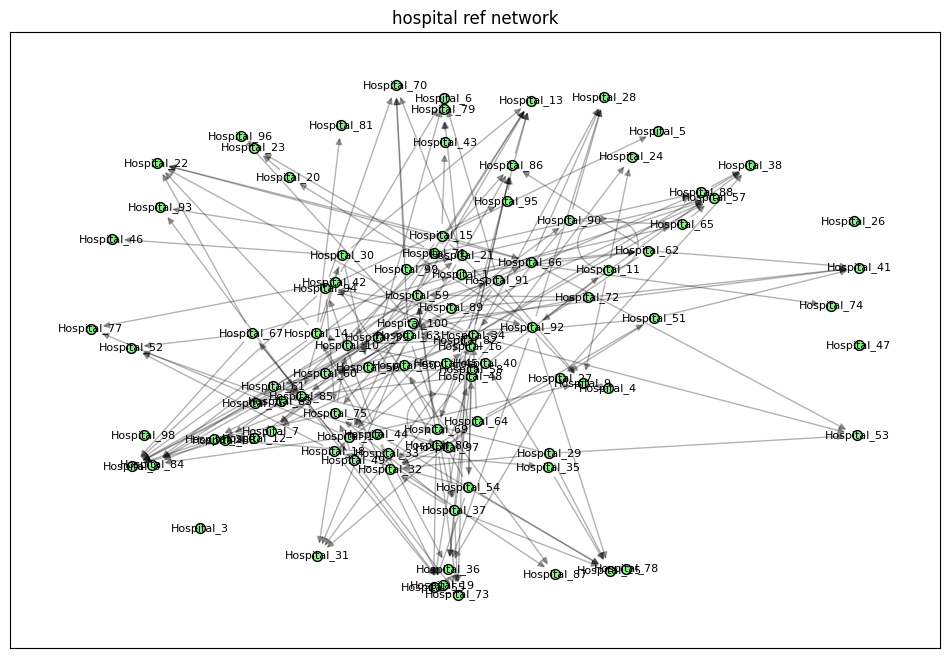

In [31]:
# check the network so that the edges and nodes all are there.
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=50, node_color="lightgreen", edgecolors="black")
nx.draw_networkx_edges(G, pos, alpha=0.3, arrows=True) 

# add label to nodes
labels = {node: G.nodes[node]["name"] for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("hospital ref network")
plt.show()

<a id="task-2-cent-deg"></a>
#### Degree Centrality:
Identify the hospitals with the highest number of referral connections

In [32]:
degree_centrality = nx.degree_centrality(G)

In [33]:
centrality_df = pd.DataFrame(list(degree_centrality.items()), columns=["Node", "Degree Centrality"])
measures_df = centrality_df.copy()
centrality_df



,Node,Degree Centrality
0,H0001,0.050505
1,H0002,0.030303
2,H0003,0.000000
3,H0004,0.010101
4,H0005,0.010101
...,...,...
95,H0096,0.020202
96,H0097,0.050505
97,H0098,0.000000
98,H0099,0.040404


In [34]:
highest_degree_node = centrality_df.loc[centrality_df["Degree Centrality"].idxmax(), "Node"]
max_cent = centrality_df["Degree Centrality"].max()
print(f"Node with highest degree centrality: {highest_degree_node} with degree of centrality {max_cent}")

Node with highest degree centrality: H0034 with degree of centrality 0.12121212121212122


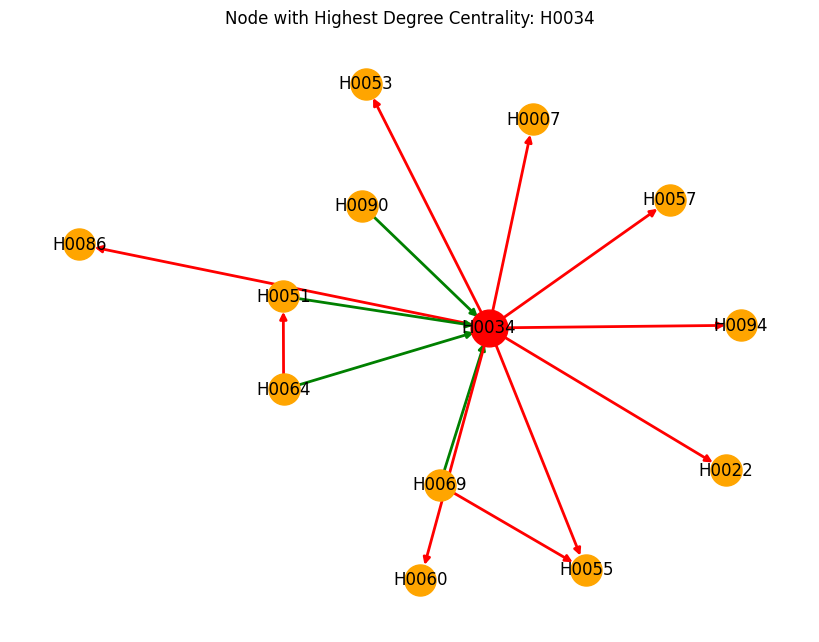

In [35]:
neighbors = list(G.neighbors(highest_degree_node)) 
in_neighbors = list(G.predecessors(highest_degree_node)) 
subgraph_nodes = [highest_degree_node] + neighbors + in_neighbors
subgraph = G.subgraph(subgraph_nodes)

#also in degree edges in plot
in_degree_edges = list(G.in_edges(highest_degree_node))

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph, seed=42, k=1) 


edge_colors = ["green" if edge in in_degree_edges else "red" for edge in subgraph.edges()]

# draw the nodes and edges
nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color="orange", edge_color=edge_colors, width=2)
nx.draw_networkx_nodes(subgraph, pos, nodelist=[highest_degree_node], node_color="red", node_size=700)


plt.title(f"Node with Highest Degree Centrality: {highest_degree_node}")
plt.show()

<a id="task-2-cent-bet"></a>
#### Betweenness Centrality:
Uncover the hospitals that act as bridges in the network, facilitating patient transfers between different healthcare providers.

In [36]:
between = nx.betweenness_centrality(G)
between_df = pd.DataFrame(list(between.items()), columns=["Node", "Betweenness Centrality"])
measures_df = pd.merge(measures_df, between_df, on="Node")
measures_df

,Node,Degree Centrality,Betweenness Centrality
0,H0001,0.050505,0.003556
1,H0002,0.030303,0.000756
2,H0003,0.000000,0.000000
3,H0004,0.010101,0.000000
4,H0005,0.010101,0.000000
...,...,...,...
95,H0096,0.020202,0.000103
96,H0097,0.050505,0.074881
97,H0098,0.000000,0.000000
98,H0099,0.040404,0.000000


In [37]:
highest_degree_node = between_df.loc[between_df["Betweenness Centrality"].idxmax(), "Node"]
max_cent = between_df["Betweenness Centrality"].max()
print(f"Node with highest degree Betweenness Centrality: {highest_degree_node} with degree of Betweenness Centrality {max_cent}")

Node with highest degree Betweenness Centrality: H0097 with degree of Betweenness Centrality 0.0748814677386106


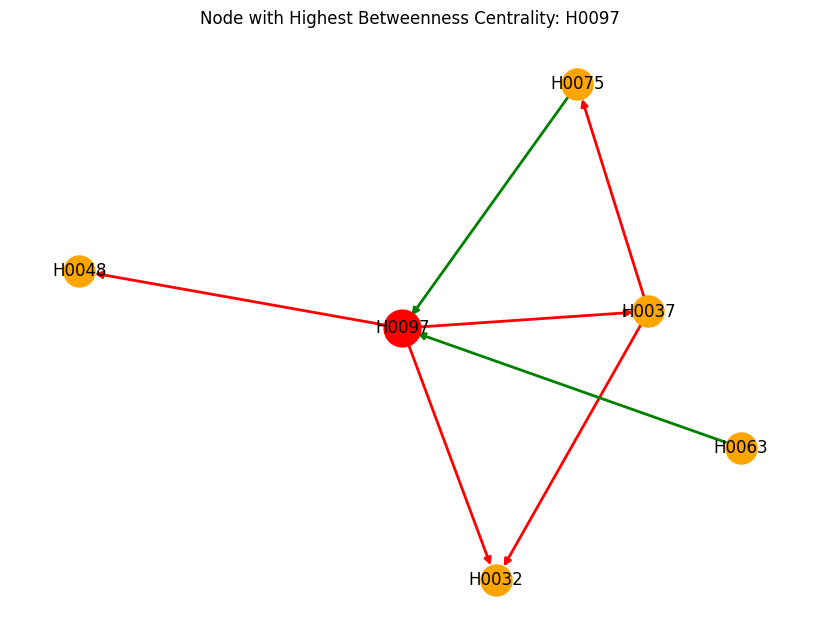

In [38]:
neighbors = list(G.neighbors(highest_degree_node)) 
in_neighbors = list(G.predecessors(highest_degree_node)) 
subgraph_nodes = [highest_degree_node] + neighbors + in_neighbors
subgraph = G.subgraph(subgraph_nodes)

#also in degree edges in plot
in_degree_edges = list(G.in_edges(highest_degree_node))

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph, seed=42, k=1) 


edge_colors = ["green" if edge in in_degree_edges else "red" for edge in subgraph.edges()]

# draw the nodes and edges
nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color="orange", edge_color=edge_colors, width=2)
nx.draw_networkx_nodes(subgraph, pos, nodelist=[highest_degree_node], node_color="red", node_size=700)


plt.title(f"Node with Highest Betweenness Centrality: {highest_degree_node}")
plt.show()

<a id="task-2-cent-clo"></a>
#### Closeness Centrality:
Determine the hospitals that can reach others quickly, indicating their accessibility and importance in the network.

In [39]:
closeness = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(list(closeness.items()), columns=["Node", "Closeness Centrality"])
measures_df = pd.merge(measures_df, closeness_df, on="Node")
closeness_df

,Node,Closeness Centrality
0,H0001,0.013468
1,H0002,0.095412
2,H0003,0.000000
3,H0004,0.000000
4,H0005,0.010101
...,...,...
95,H0096,0.010101
96,H0097,0.092045
97,H0098,0.000000
98,H0099,0.000000


In [40]:
highest_degree_node = closeness_df.loc[closeness_df["Closeness Centrality"].idxmax(), "Node"]
max_cent = closeness_df["Closeness Centrality"].max()
print(f"Node with highest degree Closeness Centrality: {highest_degree_node} with degree of Closeness Centrality {max_cent}")

Node with highest degree Closeness Centrality: H0008 with degree of Closeness Centrality 0.19425019425019427


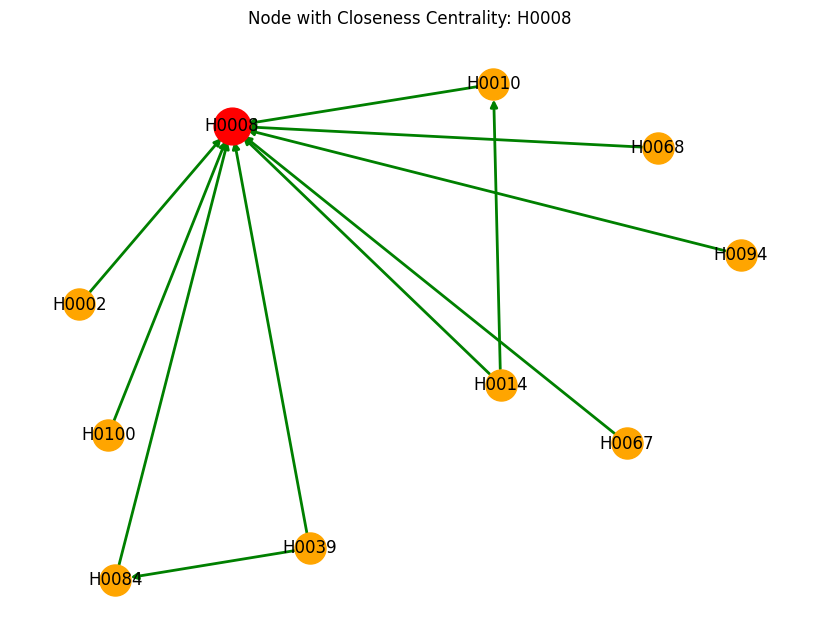

In [41]:
neighbors = list(G.neighbors(highest_degree_node)) 
in_neighbors = list(G.predecessors(highest_degree_node)) 
subgraph_nodes = [highest_degree_node] + neighbors + in_neighbors
subgraph = G.subgraph(subgraph_nodes)


plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph, seed=42, k=1) 


edge_colors = ["green"]

# draw the nodes and edges
nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color="orange", edge_color=edge_colors, width=2)
nx.draw_networkx_nodes(subgraph, pos, nodelist=[highest_degree_node], node_color="red", node_size=700)


plt.title(f"Node with Closeness Centrality: {highest_degree_node}")
plt.show()

<a id="task-2-cent-pr"></a>
#### PageRank:
Identify the hospitals with high influence based on the structure of the referral network.

In [42]:
pagerank = nx.pagerank(G)
pagerank_df = pd.DataFrame(list(pagerank.items()), columns=["Node", "Pagerank"])
measures_df = pd.merge(measures_df, pagerank_df, on="Node")
measures_df

/opt/conda/lib/python3.10/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,Pagerank
0,H0001,0.050505,0.003556,0.013468,0.004812
1,H0002,0.030303,0.000756,0.095412,0.007348
2,H0003,0.000000,0.000000,0.000000,0.003914
3,H0004,0.010101,0.000000,0.000000,0.003914
4,H0005,0.010101,0.000000,0.010101,0.004469
...,...,...,...,...,...
95,H0096,0.020202,0.000103,0.010101,0.004580
96,H0097,0.050505,0.074881,0.092045,0.007348
97,H0098,0.000000,0.000000,0.000000,0.003914
98,H0099,0.040404,0.000000,0.000000,0.003914


In [43]:
highest_degree_node = pagerank_df.loc[pagerank_df["Pagerank"].idxmax(), "Node"]
max_cent = pagerank_df["Pagerank"].max()
print(f"Node with highest Pagerank: {highest_degree_node} with degree of Pagerank {max_cent}")

Node with highest Pagerank: H0079 with degree of Pagerank 0.051303806916997687


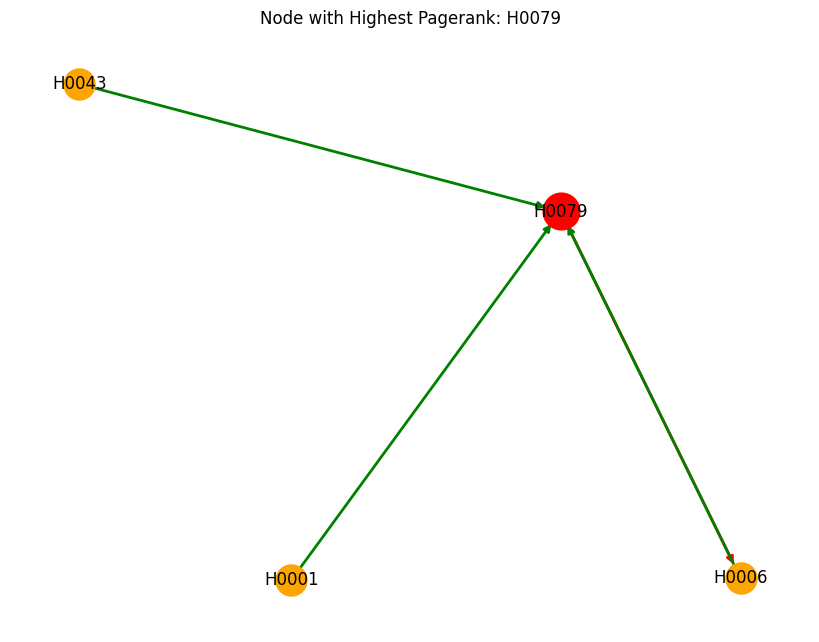

In [44]:
neighbors = list(G.neighbors(highest_degree_node)) 
in_neighbors = list(G.predecessors(highest_degree_node)) 
subgraph_nodes = [highest_degree_node] + neighbors + in_neighbors
subgraph = G.subgraph(subgraph_nodes)

#also in degree edges in plot
in_degree_edges = list(G.in_edges(highest_degree_node))

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph, seed=42, k=1) 


edge_colors = ["green" if edge in in_degree_edges else "red" for edge in subgraph.edges()]

# draw the nodes and edges
nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color="orange", edge_color=edge_colors, width=2)
nx.draw_networkx_nodes(subgraph, pos, nodelist=[highest_degree_node], node_color="red", node_size=700)


plt.title(f"Node with Highest Pagerank: {highest_degree_node}")
plt.show()

<a id="task-2-cent-task"></a>
#### Perform the following tasks:
 • Create a table showing the top 10 hospitals based on each centrality measure
 
 • Calculate the number of common hospitals in the top 10 list for each pair of centrality measures
 
 • Are certain specializations (e.g., cardiology or oncology) that dominate the top positions across multiple centrality measures?
 
 • Compute the correlations between the centrality measures to evaluate the similarity in rankings

In [45]:
# Create a table showing the top 10 hospitals based on each centrality measure
node_attributes = [
    (node,G.nodes[node].get("name"), G.nodes[node].get("location"), G.nodes[node].get("specialization")) 
    for node in G.nodes
]
attributes_df = pd.DataFrame(node_attributes, columns=["Node","Name", "Location", "Specialization"])
all_df = pd.merge(measures_df, attributes_df, on="Node")

top_10_d = all_df.nlargest(10, "Degree Centrality")
top_10_c = all_df.nlargest(10, "Closeness Centrality")
top_10_p = all_df.nlargest(10, "Pagerank")
top_10_b = all_df.nlargest(10, "Betweenness Centrality")

#top 10 of every without duplicates
top_10 = pd.concat([top_10_d, top_10_c, top_10_p,top_10_b], ignore_index=True)
top_10 = top_10.drop_duplicates(subset="Node", keep="first")
top_10

,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,Pagerank,Name,Location,Specialization
0,H0034,0.121212,0.026948,0.054545,0.008666,Hospital_34,Los Angeles,Cardiology
1,H0008,0.090909,0.000000,0.194250,0.042760,Hospital_8,Miami,Neurology
2,H0063,0.090909,0.051428,0.080040,0.006837,Hospital_63,Houston,Cardiology
3,H0010,0.080808,0.045815,0.086631,0.008859,Hospital_10,Miami,Oncology
4,H0014,0.080808,0.004277,0.010101,0.004469,Hospital_14,New York,Cardiology
5,H0059,0.080808,0.021059,0.058126,0.008120,Hospital_59,Chicago,Cardiology
6,H0092,0.080808,0.021056,0.057082,0.006315,Hospital_92,Miami,Cardiology
7,H0017,0.070707,0.023191,0.085561,0.006656,Hospital_17,Miami,Oncology
8,H0021,0.070707,0.019962,0.074517,0.007256,Hospital_21,Los Angeles,Cardiology
9,H0025,0.070707,0.000000,0.111322,0.016487,Hospital_25,Houston,Neurology


In [46]:
column_map = {
    "d": "Degree Centrality",
    "c": "Closeness Centrality",
    "p": "Pagerank",
    "b": "Betweenness Centrality"
}

what = input('Enter "d" for degree, "c" for closeness, "p" for PageRank, or "b" for Betweenness: ').strip().lower()

if what in column_map:
    selected_column = column_map[what]
    result = top_10.sort_values(by=column_map[what], ascending=False).head(10)[["Node", selected_column]]
    print(result)
else:
    print("Invalid input. Please enter 'd', 'c', 'p', or 'b'.")

Enter "d" for degree, "c" for closeness, "p" for PageRank, or "b" for Betweenness:  d


     Node  Degree Centrality
0   H0034           0.121212
2   H0063           0.090909
1   H0008           0.090909
3   H0010           0.080808
4   H0014           0.080808
5   H0059           0.080808
6   H0092           0.080808
36  H0066           0.070707
15  H0032           0.070707
14  H0086           0.070707


In [47]:
# Calculate the number of common hospitals in the top 10 list for each pair of centrality measures
for hospital in top_10_d["Name"]:
    appear_in = []
    if hospital in top_10_c["Name"].values:
        appear_in.append("Closeness Centrality")
        
    if hospital in top_10_p["Name"].values:
        appear_in.append("Pagerank")
    
    if hospital in top_10_b["Name"].values:
        appear_in.append("Betweenness Centrality")
    
    if len(appear_in) > 0:
        appear_in.append("Degree Centrality")
        print(f"{hospital} appears in: {', '.join(appear_in)}")



Hospital_8 appears in: Closeness Centrality, Pagerank, Degree Centrality
Hospital_63 appears in: Betweenness Centrality, Degree Centrality
Hospital_10 appears in: Betweenness Centrality, Degree Centrality
Hospital_25 appears in: Closeness Centrality, Degree Centrality


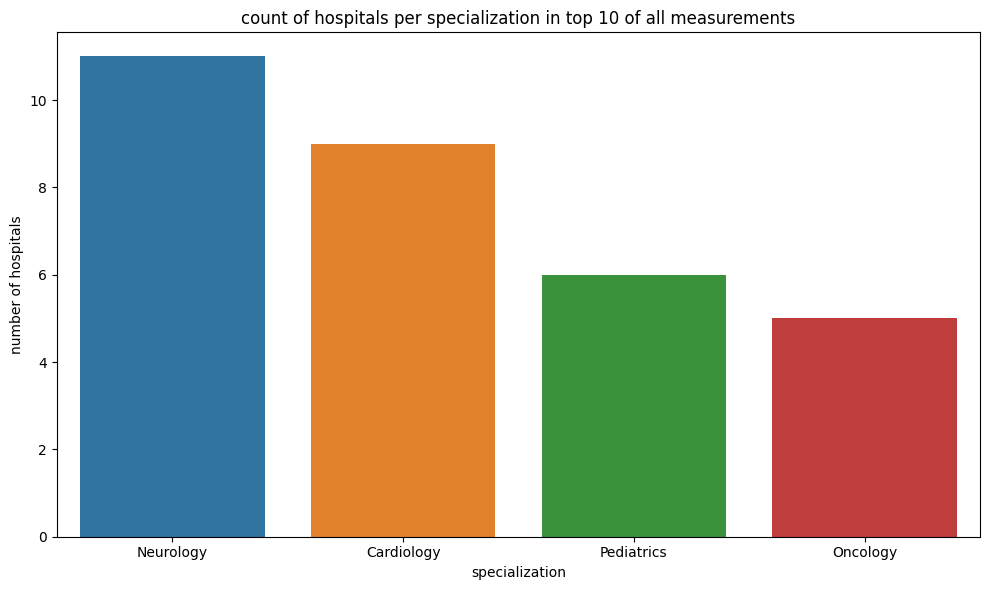

In [48]:
#  Are certain specializations (e.g., cardiology or oncology) 
#that dominate the top positions across multiple centrality measures?
specialization_counts = top_10["Specialization"].value_counts()

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    x=specialization_counts.index, 
    y=specialization_counts.values,
    ax=ax
)
ax.set_title("count of hospitals per specialization in top 10 of all measurements")
ax.set_ylabel("number of hospitals")
ax.set_xlabel("specialization")


plt.tight_layout()
plt.show()

In [49]:
#  Are certain specializations (e.g., cardiology or oncology) 
#that dominate the top positions across multiple centrality measures?


top_10_d = all_df.nlargest(10, "Degree Centrality")
top_10_c = all_df.nlargest(10, "Closeness Centrality")
top_10_p = all_df.nlargest(10, "Pagerank")
top_10_b = all_df.nlargest(10, "Betweenness Centrality")
specialization_counts_d = top_10_d["Specialization"].value_counts()
specialization_counts_c = top_10_c["Specialization"].value_counts()
specialization_counts_p = top_10_p["Specialization"].value_counts()
specialization_counts_b = top_10_b["Specialization"].value_counts()

print("Degree Centrality:\n",specialization_counts_d)
print("Closeness Centrality:\n",specialization_counts_c)
print("Pagerank:\n", specialization_counts_p)
print("Betweenness Centrality:\n",specialization_counts_b)
# duuna nån smart plot på dehär

Degree Centrality:
 Cardiology    6
Neurology     2
Oncology      2
Name: Specialization, dtype: int64
Closeness Centrality:
 Neurology     9
Pediatrics    1
Name: Specialization, dtype: int64
Pagerank:
 Neurology     6
Pediatrics    4
Name: Specialization, dtype: int64
Betweenness Centrality:
 Oncology      4
Cardiology    4
Pediatrics    2
Name: Specialization, dtype: int64


#### Are certain specializationsthat dominate the top positions across multiple centrality measures?

yes there are:

Nuerology: closeness, pagerank

Cardiology: Betweeness, degree centrality

In [50]:
# Compute the correlations between the centrality measures to evaluate the similarity in rankings
measures_df.drop(columns=["Node"]).corr()


,Degree Centrality,Betweenness Centrality,Closeness Centrality,Pagerank
Degree Centrality,1.000000,0.415337,0.322233,0.140667
Betweenness Centrality,0.415337,1.000000,0.258246,-0.038723
Closeness Centrality,0.322233,0.258246,1.000000,0.572443
Pagerank,0.140667,-0.038723,0.572443,1.000000


 ### evaluate the similarity in rankings:

***Closeness Centrality and Pagerank: Strongest positive correlation***

Correlation: 0.5724 (Moderate positive correlation)


Nodes that are more central in the network aka closer to all nodes also have higher pagerank. 
This makes sense as pagerank takes to account the neighbours while closeness is all about distance, so a neighbour is highly likly to be a short distance away.



 
  

<a id="task-3"></a>
#### Task 3.
(**16 points**, Descriptive and Predictive modeling, Feature selection, Neural networks) In this exercise, you will have to analyze a dataset (cancer.csv) that includes information about breast cancer patients, with the outcome being whether it is malignant (1) or benign (0), as specified in the ’diagnosis’ column. You have to analyse the data set from different perspectives, with the main focus on understanding what are the most important variables that determine the diagnosis.

In [51]:
cancer = pd.read_csv("cancer.csv")
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<a id="task-3-desc"></a>
#### Descriptive Analysis:
Perform some descriptive analysis to get a picture of the data, keeping in mind that you are mainly interested in understanding the impact of the variables on ’diagnosis’. In order to do so, you are free to choose on what other variables you focus on, but choose at least 4 and investigate their relationship with ’diagnosis’. You may do this buy creating summary statistics and visualizations.

In [52]:
features = cancer.iloc[:, 4:12]
target = cancer["diagnosis"]
cancer_df = pd.concat([features, target], axis=1)
cancer_df.describe()

,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.372583
std,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.483918
min,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000
25%,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.000000
50%,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.000000
75%,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,1.000000
max,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.000000


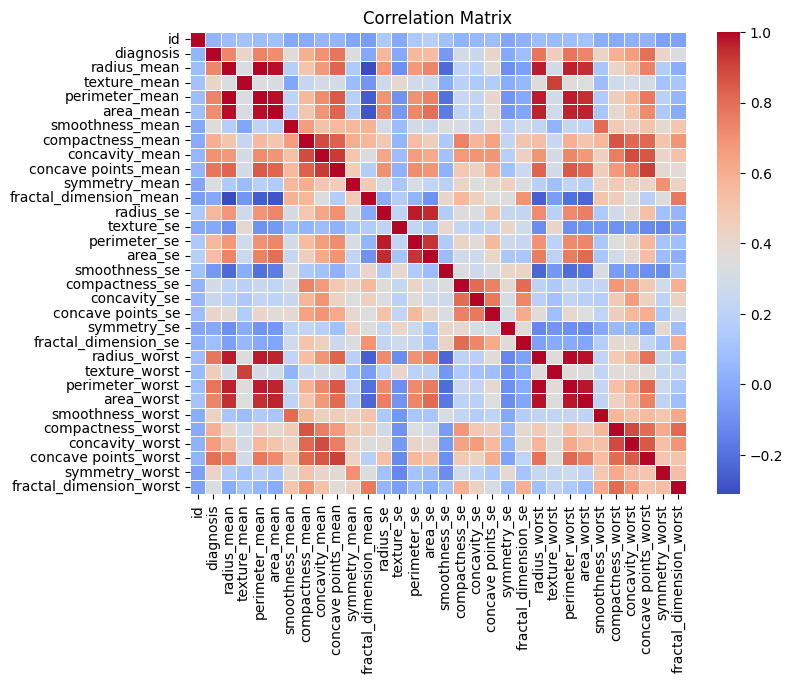

In [53]:
#good old correlation matrix
correlation_matrix = cancer.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [54]:
#check corr to diagnosis
corr= cancer.corr()
cancer_corr = corr["diagnosis"].sort_values(ascending=False)
print(cancer_corr)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

<a id="task-3-rand"></a>
#### Random Forest:
Build a Random Forest classification model for predicting ’diagnosis’ using all the variables (except for the id column). What is accuracy you can achieve? What are the three most important predicting features?

In [55]:
X = cancer.drop(columns=["id","diagnosis"])
y = cancer["diagnosis"]
X_train,X_test, y_train, y_test = train_test_split(X , y, test_size= 0.20, random_state=0)

## rfc_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0, min_samples_leaf=2, min_samples_split=2)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_preds_train_rounded = np.round(rfc.predict(X_train)).astype(int)
rfc_preds_test_rounded = np.round(rfc.predict(X_test)).astype(int)
print("Forest train accuracy: ",accuracy_score(y_train,rfc_preds_train_rounded))
print("Forest test accuracy: ",accuracy_score(y_test,rfc_preds_test_rounded))

importance_rfc= abs(rfc.feature_importances_)
rfc_importances = pd.Series(importance_rfc, index=X.columns).sort_values(ascending=False)
print("Top 3 features in Random Forest Classifier:\n",rfc_importances.head(3))

Forest train accuracy:  1.0
Forest test accuracy:  0.9736842105263158
Top 3 features in Random Forest Classifier:
 concave points_worst    0.152152
area_worst              0.138520
concave points_mean     0.098046
dtype: float64


#### What is accuracy you can achieve? What are the three most important predicting features?
Forest train accuracy: 1.0

Forest test accuracy:  0.9736842105263158

Top 3 features in Random Forest Classifier:

concave points_worst   
area_worst             
concave points_mean          

Could most likely use a grid search/random search to improve the model results but they are already high so didn't see a point in spending time on it + it does not seem it is totally overfitted as the accuracy goes down 2% for the test accuracy. 

<a id="task-3-feat"></a>
#### Feature Selection:
Perform feature selection using Recursive Feature Elimination and Random Forests as it was done in the course. Calculate the accuracy when setting n features to select to 3, 5, 7, and 9. Which value gives the highest accuracy?

In [56]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
accuracy_results = {}
best_accuracy_3579 = -1
best_accuracy_3579_number = None

for n_features in range(1,30):
    rfe = RFE(estimator=rfc, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    # automatically chooses the best features and adds the next one in the list
    selected_features = X_train.columns[rfe.support_]
    
    rfc.fit(X_train[selected_features], y_train)
    y_pred = rfc.predict(X_test[selected_features])
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[n_features] = accuracy
    
    if n_features in [3,5,7,9]:
        if accuracy > best_accuracy_3579:
            best_accuracy_3579 = accuracy
            best_accuracy_3579_number = n_features
        

for n_features, accuracy in accuracy_results.items():
    print(f"Accuracy with {n_features} selected features: {accuracy}")
    
best_n_features = max(accuracy_results, key=accuracy_results.get)
best_accuracy = accuracy_results[best_n_features]

print(f"\nThe best accuracy ({best_accuracy}) was obtained with {best_n_features} features.")
print(f"\nThe best accuracy in 3,5,7,9 ({best_accuracy_3579}) was obtained with {best_accuracy_3579_number} features.")


Accuracy with 1 selected features: 0.8947368421052632
Accuracy with 2 selected features: 0.9210526315789473
Accuracy with 3 selected features: 0.9473684210526315
Accuracy with 4 selected features: 0.9649122807017544
Accuracy with 5 selected features: 0.9736842105263158
Accuracy with 6 selected features: 0.9649122807017544
Accuracy with 7 selected features: 0.9736842105263158
Accuracy with 8 selected features: 0.9736842105263158
Accuracy with 9 selected features: 0.956140350877193
Accuracy with 10 selected features: 0.956140350877193
Accuracy with 11 selected features: 0.9649122807017544
Accuracy with 12 selected features: 0.9736842105263158
Accuracy with 13 selected features: 0.9736842105263158
Accuracy with 14 selected features: 0.9736842105263158
Accuracy with 15 selected features: 0.9736842105263158
Accuracy with 16 selected features: 0.9736842105263158
Accuracy with 17 selected features: 0.9736842105263158
Accuracy with 18 selected features: 0.9736842105263158
Accuracy with 19 sele

<a id="task-3-llm"></a>
#### Large Language Model:
The code written by a Large Language Model when prompted to build a neural network classification model with PyTorch, can be found in the Assignment 2.ipynb notebook. It is working already, but it has no comments and explanations included, so you have to understand what it does based on the lecture on the use of PyTorch. Does the model provide better performance than the Random Forest model? Try to modify different parameters that were discussed in the course (at least try structure of layers, learning rate, activation function). Add comments in the code explaining where the parameters were modified in the code, what alternatives you tried, and record for which version you got the best performance.

In [57]:
# Code generated by a large language model to build a neural network classification model 



# Modified Set seed for reproducibility
import random
seed_value = 42
torch.manual_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)


# Loading  
cancer = pd.read_csv('cancer.csv')
cancer_df = cancer
#preprocessing the data: choosing the correct columns for features to use and getting the targets for y we try to predict
features = cancer_df[cancer_df.columns[2:-1]]
X = np.array(features)  
target = cancer_df[cancer_df.columns[1]]
y = np.array(target)

# splitting the data in to training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state= seed_value) # Modified Set seed for reproducibility

# convertion data to pytorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float).unsqueeze(1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float).unsqueeze(1)

learning_rates = [0.0005, 0.001, 0.002] # Modified to try learning rates
layer_configs = [(29,16,10,6), (29,12,8,4), (29,20,12,8)] # Modified to try layer configs
activation_functions = [nn.Tanh, nn.ReLU] # Modified to try activation functions


best_accuracy = 0  # Modified need to save results somewhere
best_config = None # Modified need to save results somewhere

criterion = nn.BCELoss()
for lr in learning_rates:
    for layer_config in layer_configs:
        for activation_func in activation_functions:
            model = nn.Sequential(
                nn.Linear(layer_config[0], layer_config[1]), #Modified: test diffrent configs from the list
                activation_func(), #Modified: change of activiation function between hyperbolic tangent and rectified linear unit
                nn.Linear(layer_config[1], layer_config[2]), #Modified: test diffrent configs from the list
                nn.ReLU(), 
                nn.Linear(layer_config[2], layer_config[3]),  #Modified: test diffrent configs from the list
                nn.ReLU(), 
                nn.Linear(layer_config[3], 1),  #Modified: test diffrent configs from the list
                nn.Sigmoid()  
            )
            optimizer = torch.optim.Adam(model.parameters(), lr=lr) #Modified: test diffrent lr from the list
            dataset = TensorDataset(X_train_tensor, y_train_tensor)
            dataloader = DataLoader(dataset, shuffle=True, batch_size=2)
            
            for epoch in range(100):
                for data in dataloader:
                    optimizer.zero_grad()
                    feature, target = data
                    pred = model(feature)
                    loss = criterion(pred, target)
                    loss.backward()
                    optimizer.step()
                model.eval()
                with torch.no_grad():
                    val_outputs = model(X_val_tensor)
                    val_loss = criterion(val_outputs, y_val_tensor)
                if (epoch + 1) % 10 == 0:
                    print(f"Epoch [{epoch+1}/{100}], Train Loss: {loss.item():.4f}")
            metric = BinaryAccuracy()
            output = model(X_train_tensor)
            acc = metric(output, y_train_tensor)
            print(acc)
            
            metric = BinaryAccuracy()
            output = model(X_val_tensor)
            acc = metric(output, y_val_tensor)
            print(acc)
            
            if acc > best_accuracy: #Modified to save the best model of the runs somewhere
                best_accuracy = acc
                best_config = (lr, layer_config, activation_func.__name__)

#Modified so can "record for which version you got the best performance."
print(f"\nBest configuration - LR: {best_config[0]}, Layers: {best_config[1]}, Activation: {best_config[2]}, Accuracy: {best_accuracy:}") 



Epoch [10/100], Train Loss: 0.1083
Epoch [20/100], Train Loss: 0.1783
Epoch [30/100], Train Loss: 0.5399
Epoch [40/100], Train Loss: 2.2701
Epoch [50/100], Train Loss: 0.0616
Epoch [60/100], Train Loss: 0.0956
Epoch [70/100], Train Loss: 0.0831
Epoch [80/100], Train Loss: 0.0535
Epoch [90/100], Train Loss: 0.5445
Epoch [100/100], Train Loss: 0.0308
tensor(0.8571)
tensor(0.8947)
Epoch [10/100], Train Loss: 0.5434
Epoch [20/100], Train Loss: 3.1640
Epoch [30/100], Train Loss: 0.0100
Epoch [40/100], Train Loss: 0.0247
Epoch [50/100], Train Loss: 0.1940
Epoch [60/100], Train Loss: 0.0045
Epoch [70/100], Train Loss: 0.1361
Epoch [80/100], Train Loss: 0.0005
Epoch [90/100], Train Loss: 0.0002
Epoch [100/100], Train Loss: 0.1802
tensor(0.9187)
tensor(0.9561)
Epoch [10/100], Train Loss: 0.3316
Epoch [20/100], Train Loss: 0.0979
Epoch [30/100], Train Loss: 0.0807
Epoch [40/100], Train Loss: 0.1246
Epoch [50/100], Train Loss: 0.0990
Epoch [60/100], Train Loss: 0.0563
Epoch [70/100], Train Loss: 

### Does the model provide better performance than the Random Forest model?
No but marginally, 0.9736841917037964 

20 features Random Forest model: 0.9824561403508771

5 features Random Forest model: 0.9736842105263158

### record for which version you got the best performance:
Best configuration - LR: 0.0005, Layers: (29, 12, 8, 4), Activation: ReLU, Accuracy: 0.9736841917037964

<a id="task-4"></a>
#### Task 4.
(**10 points**, Text analytics) In this exercise you will have to work with the data provided in the file ’trustpilot.csv’. The data contains information about 917 reviews of different e-commerce platforms from the review aggregator site Trustpilot. In the data, you have the following information:

• Card id: review id 

• Header: the header of the review 

• Review: the text of the review 

• Location: the location of the user submitting the review 

• shop: the e-commerce store reviewed (one of Zalando, Wish, Sheinside, Boozt or Nelly)

In [58]:
trustpilot = pd.read_csv("trustpilot.csv")
trustpilot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Card_id   917 non-null    object
 1   Header    917 non-null    object
 2   Review    917 non-null    object
 3   Location  917 non-null    object
 4   shop      917 non-null    object
dtypes: object(5)
memory usage: 35.9+ KB


<a id="task-4-desc"></a>
#### Descriptive Analysis:
Start with performing some descriptive analysis on the data: check at least distribution of locations, frequency of shops, average rating per shop type.


In [59]:
#check distribution of locations
location_dist = trustpilot["Location"].value_counts()
location_dist

Britain (UK)      411
United States     265
Canada             28
Sweden             27
Ireland            24
Denmark            15
Netherlands        13
Norway             13
Australia          10
Croatia             9
Belgium             7
Finland             7
Slovenia            7
Estonia             7
New Zealand         4
Germany             4
Austria             4
Greece              4
Italy               4
Hungary             4
Czech Republic      3
Spain               3
France              3
Latvia              3
India               3
Nigeria             3
Jamaica             2
Portugal            2
Romania             2
Lithuania           2
Puerto Rico         2
Poland              2
Singapore           2
Pakistan            2
Iceland             2
Russia              1
Bulgaria            1
South Africa        1
Venezuela           1
Macedonia           1
Saudi Arabia        1
Cyprus              1
Bahamas             1
Jersey              1
Serbia              1
Azerbaijan

In [60]:
# frequency of shops
shops_freq = trustpilot["shop"].value_counts()
shops_freq

Zalando      337
Wish         256
Sheinside    173
Boozt        114
Nelly         37
Name: shop, dtype: int64

In the analysis, you have to work with the column ’Review’. First, perform the steps of text analysis we went through in order to preprocess the data and obtain the most frequent words across all the articles. Try to iterate it at least two times, and in each iteration you should extend the set of stopwords with new ones based on the words you obtained as frequently occurring but are not particularly informative when you try to understand what the reviews are about.

In [61]:
# obtain the most frequent words across all the articles.
review = trustpilot[["Review"]].copy()
review["Review_low"] = review["Review"].str.lower()
review

,Review,Review_low
0,"Awful experience, I ordered some trainers whic...","awful experience, i ordered some trainers whic..."
1,Warning: addictive!!! Prices have gone up some.,warning: addictive!!! prices have gone up some.
2,"Cannot fault Zalando at all, easy to use onli...","cannot fault zalando at all, easy to use onli..."
3,I placed an order 4 weeks ago still havnt reci...,i placed an order 4 weeks ago still havnt reci...
4,"I placed an order about 5 days ago, and it is ...","i placed an order about 5 days ago, and it is ..."
...,...,...
912,Arrived quickly and well packed. Great prices ...,arrived quickly and well packed. great prices ...
913,I have purchased many items from the website a...,i have purchased many items from the website a...
914,Everything great quality. Ordered multiple tim...,everything great quality. ordered multiple tim...
915,I will always continue to return to purchase f...,i will always continue to return to purchase f...


In [62]:
review["split"] = review["Review_low"].apply(lambda x: x.split())
stop_words = list(stopwords.words("english"))
review["split"] = review["split"].apply(lambda x: [item for item in x if item not in stop_words])
review.head()

,Review,Review_low,split
0,"Awful experience, I ordered some trainers whic...","awful experience, i ordered some trainers whic...","[awful, experience,, ordered, trainers, lost, ..."
1,Warning: addictive!!! Prices have gone up some.,warning: addictive!!! prices have gone up some.,"[warning:, addictive!!!, prices, gone, some.]"
2,"Cannot fault Zalando at all, easy to use onli...","cannot fault zalando at all, easy to use onli...","[cannot, fault, zalando, all,, easy, use, onli..."
3,I placed an order 4 weeks ago still havnt reci...,i placed an order 4 weeks ago still havnt reci...,"[placed, order, 4, weeks, ago, still, havnt, r..."
4,"I placed an order about 5 days ago, and it is ...","i placed an order about 5 days ago, and it is ...","[placed, order, 5, days, ago,, still, processi..."


In [63]:
stemmer = PorterStemmer()
review["split_1"] = review["split"].apply(lambda x: [stemmer.stem(word) for word in x])
review

,Review,Review_low,split,split_1
0,"Awful experience, I ordered some trainers whic...","awful experience, i ordered some trainers whic...","[awful, experience,, ordered, trainers, lost, ...","[aw, experience,, order, trainer, lost, hermes..."
1,Warning: addictive!!! Prices have gone up some.,warning: addictive!!! prices have gone up some.,"[warning:, addictive!!!, prices, gone, some.]","[warning:, addictive!!!, price, gone, some.]"
2,"Cannot fault Zalando at all, easy to use onli...","cannot fault zalando at all, easy to use onli...","[cannot, fault, zalando, all,, easy, use, onli...","[cannot, fault, zalando, all,, easi, use, onli..."
3,I placed an order 4 weeks ago still havnt reci...,i placed an order 4 weeks ago still havnt reci...,"[placed, order, 4, weeks, ago, still, havnt, r...","[place, order, 4, week, ago, still, havnt, rec..."
4,"I placed an order about 5 days ago, and it is ...","i placed an order about 5 days ago, and it is ...","[placed, order, 5, days, ago,, still, processi...","[place, order, 5, day, ago,, still, processing..."
...,...,...,...,...
912,Arrived quickly and well packed. Great prices ...,arrived quickly and well packed. great prices ...,"[arrived, quickly, well, packed., great, price...","[arriv, quickli, well, packed., great, price, ..."
913,I have purchased many items from the website a...,i have purchased many items from the website a...,"[purchased, many, items, website, excellent., ...","[purchas, mani, item, websit, excellent., qual..."
914,Everything great quality. Ordered multiple tim...,everything great quality. ordered multiple tim...,"[everything, great, quality., ordered, multipl...","[everyth, great, quality., order, multipl, tim..."
915,I will always continue to return to purchase f...,i will always continue to return to purchase f...,"[always, continue, return, purchase, zalando.,...","[alway, continu, return, purchas, zalando., in..."


In [64]:
def stem_words(word_list):
    stemmed_list = []
    for word in word_list:
        stemmed_list.append(stemmer.stem(word))
    return stemmed_list

review["split_1"] = review["split"].apply(stem_words)
review 

,Review,Review_low,split,split_1
0,"Awful experience, I ordered some trainers whic...","awful experience, i ordered some trainers whic...","[awful, experience,, ordered, trainers, lost, ...","[aw, experience,, order, trainer, lost, hermes..."
1,Warning: addictive!!! Prices have gone up some.,warning: addictive!!! prices have gone up some.,"[warning:, addictive!!!, prices, gone, some.]","[warning:, addictive!!!, price, gone, some.]"
2,"Cannot fault Zalando at all, easy to use onli...","cannot fault zalando at all, easy to use onli...","[cannot, fault, zalando, all,, easy, use, onli...","[cannot, fault, zalando, all,, easi, use, onli..."
3,I placed an order 4 weeks ago still havnt reci...,i placed an order 4 weeks ago still havnt reci...,"[placed, order, 4, weeks, ago, still, havnt, r...","[place, order, 4, week, ago, still, havnt, rec..."
4,"I placed an order about 5 days ago, and it is ...","i placed an order about 5 days ago, and it is ...","[placed, order, 5, days, ago,, still, processi...","[place, order, 5, day, ago,, still, processing..."
...,...,...,...,...
912,Arrived quickly and well packed. Great prices ...,arrived quickly and well packed. great prices ...,"[arrived, quickly, well, packed., great, price...","[arriv, quickli, well, packed., great, price, ..."
913,I have purchased many items from the website a...,i have purchased many items from the website a...,"[purchased, many, items, website, excellent., ...","[purchas, mani, item, websit, excellent., qual..."
914,Everything great quality. Ordered multiple tim...,everything great quality. ordered multiple tim...,"[everything, great, quality., ordered, multipl...","[everyth, great, quality., order, multipl, tim..."
915,I will always continue to return to purchase f...,i will always continue to return to purchase f...,"[always, continue, return, purchase, zalando.,...","[alway, continu, return, purchas, zalando., in..."


In [65]:
review["split_final"] = review["split"].apply(lambda x: ' '.join(x))
review.head()

,Review,Review_low,split,split_1,split_final
0,"Awful experience, I ordered some trainers whic...","awful experience, i ordered some trainers whic...","[awful, experience,, ordered, trainers, lost, ...","[aw, experience,, order, trainer, lost, hermes...","awful experience, ordered trainers lost hermes..."
1,Warning: addictive!!! Prices have gone up some.,warning: addictive!!! prices have gone up some.,"[warning:, addictive!!!, prices, gone, some.]","[warning:, addictive!!!, price, gone, some.]",warning: addictive!!! prices gone some.
2,"Cannot fault Zalando at all, easy to use onli...","cannot fault zalando at all, easy to use onli...","[cannot, fault, zalando, all,, easy, use, onli...","[cannot, fault, zalando, all,, easi, use, onli...","cannot fault zalando all, easy use online prod..."
3,I placed an order 4 weeks ago still havnt reci...,i placed an order 4 weeks ago still havnt reci...,"[placed, order, 4, weeks, ago, still, havnt, r...","[place, order, 4, week, ago, still, havnt, rec...",placed order 4 weeks ago still havnt recieved ...
4,"I placed an order about 5 days ago, and it is ...","i placed an order about 5 days ago, and it is ...","[placed, order, 5, days, ago,, still, processi...","[place, order, 5, day, ago,, still, processing...","placed order 5 days ago, still processing. pai..."


In [66]:
vect = CountVectorizer()
review_counts = vect.fit_transform(review["split_final"])
review_counts.shape

(917, 3518)

In [67]:
review_counts_df = pd.DataFrame(review_counts.toarray(), columns=vect.get_feature_names_out())

review_counts_df.head()

,00,000,00p,03,06,07,10,100,1000,100piece,...,yoù,yr,yried,yuletide,zalanda,zalando,zendesk,zero,zipper,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# obtain the most frequent words across all the articles.
word_count = review_counts_df.sum(axis=0).sort_values(ascending = False)
print("top 50 words")
word_count[:50]

top 50 words


order         390
service       271
ordered       260
delivery      252
wish          242
great         229
would         223
customer      216
items         209
zalando       200
never         191
refund        187
good          183
time          180
get           171
item          168
company       168
money         155
received      151
again         137
site          137
one           135
recommend     134
website       130
days          128
back          126
love          124
really        122
like          122
got           119
quality       119
fast          117
use           111
return        108
still         103
shopping      102
products      100
arrived        99
even           95
shipping       93
always         90
shop           88
buy            87
first          86
it             85
online         84
experience     84
definitely     79
prices         78
size           78
dtype: int64

In [69]:
# from this additional stop words added:
# 1. generic words would, get, one, back, like, really, even
additional_stopwords = ["would","get","again","one","back","like","really","even","order"]


stop_words_new = list(stopwords.words("english")) + additional_stopwords
vect_new = CountVectorizer(stop_words = stop_words_new)
review_counts = vect_new.fit_transform(review["split_final"])

review_counts_df_new = pd.DataFrame(review_counts.toarray(), columns=vect_new.get_feature_names_out())
word_count_new = review_counts_df_new.sum(axis=0).sort_values(ascending = False)
word_count_new[:50]

service       271
ordered       260
delivery      252
wish          242
great         229
customer      216
items         209
zalando       200
never         191
refund        187
good          183
time          180
item          168
company       168
money         155
received      151
site          137
recommend     134
website       130
days          128
love          124
quality       119
got           119
fast          117
use           111
return        108
still         103
shopping      102
products      100
arrived        99
shipping       93
always         90
shop           88
buy            87
first          86
online         84
experience     84
definitely     79
size           78
package        78
prices         78
ordering       78
clothes        76
sheinside      74
cannot         73
well           73
want           71
shein          71
easy           70
dress          70
dtype: int64

<a id="task-4-top"></a>
#### Topic Modelling:
perform topic modeling on the data with specifying four topics to be extracted. 
Based on looking at the top 15 words from each topic, can you differentiate them and explain how they are different?

In [70]:
# average rating per shop type
LDA = LatentDirichletAllocation(n_components = 3, random_state = 42)

LDA_results = LDA.fit_transform(review_counts)
LDA.components_

array([[2.83232457, 0.33373967, 0.33339044, ..., 0.33608663, 0.33338963,
        1.32077544],
       [0.38228197, 0.33393027, 0.3333959 , ..., 0.41076315, 1.33322978,
        0.34579483],
       [6.78539346, 1.33233005, 1.33321365, ..., 9.25315023, 0.33338059,
        0.33342973]])

In [71]:
for topic, component in enumerate(LDA.components_):
    
    words_sorted = np.argsort(component)[-15:]
    
    print([vect_new.get_feature_names_out()[i] for i in words_sorted])

review["Topic"] = LDA_results.argmax(axis=1)
review.head()

['excellent', 'wish', 'website', 'time', 'quick', 'easy', 'recommend', 'items', 'customer', 'fast', 'good', 'zalando', 'service', 'great', 'delivery']
['wish', 'time', 'recommend', 'shipping', 'ordered', 'always', 'shopping', 'products', 'sheinside', 'quality', 'dress', 'site', 'love', 'great', 'good']
['got', 'time', 'days', 'still', 'service', 'company', 'customer', 'items', 'received', 'item', 'money', 'wish', 'never', 'refund', 'ordered']


,Review,Review_low,split,split_1,split_final,Topic
0,"Awful experience, I ordered some trainers whic...","awful experience, i ordered some trainers whic...","[awful, experience,, ordered, trainers, lost, ...","[aw, experience,, order, trainer, lost, hermes...","awful experience, ordered trainers lost hermes...",2
1,Warning: addictive!!! Prices have gone up some.,warning: addictive!!! prices have gone up some.,"[warning:, addictive!!!, prices, gone, some.]","[warning:, addictive!!!, price, gone, some.]",warning: addictive!!! prices gone some.,0
2,"Cannot fault Zalando at all, easy to use onli...","cannot fault zalando at all, easy to use onli...","[cannot, fault, zalando, all,, easy, use, onli...","[cannot, fault, zalando, all,, easi, use, onli...","cannot fault zalando all, easy use online prod...",0
3,I placed an order 4 weeks ago still havnt reci...,i placed an order 4 weeks ago still havnt reci...,"[placed, order, 4, weeks, ago, still, havnt, r...","[place, order, 4, week, ago, still, havnt, rec...",placed order 4 weeks ago still havnt recieved ...,2
4,"I placed an order about 5 days ago, and it is ...","i placed an order about 5 days ago, and it is ...","[placed, order, 5, days, ago,, still, processi...","[place, order, 5, day, ago,, still, processing...","placed order 5 days ago, still processing. pai...",2


In [72]:
merged_df = review.merge(trustpilot[["Review", "shop"]], on="Review", how="inner")
merged_df

,Review,Review_low,split,split_1,split_final,Topic,shop
0,"Awful experience, I ordered some trainers whic...","awful experience, i ordered some trainers whic...","[awful, experience,, ordered, trainers, lost, ...","[aw, experience,, order, trainer, lost, hermes...","awful experience, ordered trainers lost hermes...",2,Zalando
1,Warning: addictive!!! Prices have gone up some.,warning: addictive!!! prices have gone up some.,"[warning:, addictive!!!, prices, gone, some.]","[warning:, addictive!!!, price, gone, some.]",warning: addictive!!! prices gone some.,0,Wish
2,"Cannot fault Zalando at all, easy to use onli...","cannot fault zalando at all, easy to use onli...","[cannot, fault, zalando, all,, easy, use, onli...","[cannot, fault, zalando, all,, easi, use, onli...","cannot fault zalando all, easy use online prod...",0,Zalando
3,I placed an order 4 weeks ago still havnt reci...,i placed an order 4 weeks ago still havnt reci...,"[placed, order, 4, weeks, ago, still, havnt, r...","[place, order, 4, week, ago, still, havnt, rec...",placed order 4 weeks ago still havnt recieved ...,2,Sheinside
4,"I placed an order about 5 days ago, and it is ...","i placed an order about 5 days ago, and it is ...","[placed, order, 5, days, ago,, still, processi...","[place, order, 5, day, ago,, still, processing...","placed order 5 days ago, still processing. pai...",2,Sheinside
...,...,...,...,...,...,...,...
2034,Arrived quickly and well packed. Great prices ...,arrived quickly and well packed. great prices ...,"[arrived, quickly, well, packed., great, price...","[arriv, quickli, well, packed., great, price, ...",arrived quickly well packed. great prices woul...,0,Zalando
2035,I have purchased many items from the website a...,i have purchased many items from the website a...,"[purchased, many, items, website, excellent., ...","[purchas, mani, item, websit, excellent., qual...",purchased many items website excellent. qualit...,0,Sheinside
2036,Everything great quality. Ordered multiple tim...,everything great quality. ordered multiple tim...,"[everything, great, quality., ordered, multipl...","[everyth, great, quality., order, multipl, tim...",everything great quality. ordered multiple tim...,1,Boozt
2037,I will always continue to return to purchase f...,i will always continue to return to purchase f...,"[always, continue, return, purchase, zalando.,...","[alway, continu, return, purchas, zalando., in...",always continue return purchase zalando. incre...,0,Zalando


In [73]:
# average rating per shop type
# 0 and 1 are positive topics and 2 is a negative
merged_df["pos/neg"] = merged_df["Topic"].apply(lambda x: "pos" if x in [0, 1] else "neg")
grouped = merged_df.groupby(["shop", "pos/neg"]).size().unstack(fill_value=0)

# precentage calc
grouped["total"] = grouped.sum(axis=1)
grouped["positive_percentage"] = (grouped["pos"] / grouped["total"]) * 100
grouped["negative_percentage"] = (grouped["neg"] / grouped["total"]) * 100
grouped

pos/neg,neg,pos,total,positive_percentage,negative_percentage
shop,,,,,
Boozt,6,273,279,97.849462,2.150538
Nelly,6,64,70,91.428571,8.571429
Sheinside,82,289,371,77.897574,22.102426
Wish,139,381,520,73.269231,26.730769
Zalando,100,699,799,87.484355,12.515645


#### Based on looking at the top 15 words from each topic, can you differentiate them and explain how they are different?
Topic 0: 'excellent', 'wish', 'website', 'time', 'quick', 'easy'....... = positive 

Topic 1:  'dress', 'site', 'love', 'great', 'good' ..... = positive

Topic 2: money', 'wish', 'never', 'refund', 'ordered'...... = negative
